In [83]:
using Pkg
using Printf
using JuMP
using Cbc,GLPK
using LightGraphs
using GraphPlot

In [84]:
println("This code receives a graph")
arq=open("graph.txt", "r")
texto=read(arq, String)
texto=(split(replace(texto, "\r"=>""),"\n"))

This code receives a graph


21-element Vector{SubString{String}}:
 "11"
 "1 2"
 "1 4"
 "1 7"
 "1 9"
 "2 3"
 "2 6"
 "2 8"
 "3 5"
 "3 7"
 "3 10"
 "4 5"
 "4 6"
 "4 10"
 "5 8"
 "5 9"
 "6 11"
 "7 11"
 "8 11"
 "9 11"
 "10 11"

In [85]:
number_of_vertices = parse(Int32,texto[1])
println("number of vertices $number_of_vertices")

edges=map(x->parse.(Int32,x), split.(texto[2:end]))
number_of_edges = length(edges)
println("size of set edges $(number_of_edges)")

M = zeros(Int32, number_of_vertices, number_of_vertices)

number of vertices 11
size of set edges 20


11×11 Matrix{Int32}:
 0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0

In [86]:
GraphInitial = Graph(number_of_vertices)



{11, 0} undirected simple Int32 graph

In [87]:
println("edges")
for i = 1:length(edges)
    M[edges[i][1],edges[i][2]] = M[edges[i][2],edges[i][1]] = 1
    println("$(edges[i][1]) from $(edges[i][2])")
    add_edge!(GraphInitial, edges[i][1], edges[i][2])
end

edges
1 from 2
1 from 4
1 from 7
1 from 9
2 from 3
2 from 6
2 from 8
3 from 5
3 from 7
3 from 10
4 from 5
4 from 6
4 from 10
5 from 8
5 from 9
6 from 11
7 from 11
8 from 11
9 from 11
10 from 11


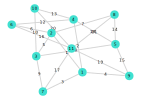

In [88]:
gplot(GraphInitial, nodelabel=1:number_of_vertices, edgelabel=1:number_of_edges)

In [89]:
println("adjacency matrix")
for i = 1:number_of_vertices
    for j = 1:number_of_vertices
        print("$(M[i,j]) ")
    end
    println()
end

adjacency matrix
0 1 0 1 0 0 1 0 1 0 0 
1 0 1 0 0 1 0 1 0 0 0 
0 1 0 0 1 0 1 0 0 1 0 
1 0 0 0 1 1 0 0 0 1 0 
0 0 1 1 0 0 0 1 1 0 0 
0 1 0 1 0 0 0 0 0 0 1 
1 0 1 0 0 0 0 0 0 0 1 
0 1 0 0 1 0 0 0 0 0 1 
1 0 0 0 1 0 0 0 0 0 1 
0 0 1 1 0 0 0 0 0 0 1 
0 0 0 0 0 1 1 1 1 1 0 


In [90]:
# The maximum number of iterations allowed
MAX_ITER = 100

theta = 0.01

# The best-known feasible solutions and best lambda
x_best = zeros(number_of_vertices, number_of_vertices)
lambda_best = zeros(number_of_vertices)

# Initial multiplier
coef_current = zeros(number_of_vertices, number_of_vertices);
coef_old = zeros(number_of_vertices, number_of_vertices);
coef_best = zeros(number_of_vertices, number_of_vertices);

# lambda
lambda_current = zeros(number_of_vertices)
lambda_old = zeros(number_of_vertices)

lpModel = Model(Cbc.Optimizer)

# Z = Array{Int}(0)
Z = Float64[]

Float64[]

In [91]:
lpModel = Model(Cbc.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: COIN Branch-and-Cut (Cbc)

In [92]:
@variable(lpModel, var_x[i = 1:number_of_vertices, j = 1:number_of_vertices], lower_bound=0, upper_bound=1, Int)

11×11 Matrix{VariableRef}:
 var_x[1,1]   var_x[1,2]   var_x[1,3]   …  var_x[1,10]   var_x[1,11]
 var_x[2,1]   var_x[2,2]   var_x[2,3]      var_x[2,10]   var_x[2,11]
 var_x[3,1]   var_x[3,2]   var_x[3,3]      var_x[3,10]   var_x[3,11]
 var_x[4,1]   var_x[4,2]   var_x[4,3]      var_x[4,10]   var_x[4,11]
 var_x[5,1]   var_x[5,2]   var_x[5,3]      var_x[5,10]   var_x[5,11]
 var_x[6,1]   var_x[6,2]   var_x[6,3]   …  var_x[6,10]   var_x[6,11]
 var_x[7,1]   var_x[7,2]   var_x[7,3]      var_x[7,10]   var_x[7,11]
 var_x[8,1]   var_x[8,2]   var_x[8,3]      var_x[8,10]   var_x[8,11]
 var_x[9,1]   var_x[9,2]   var_x[9,3]      var_x[9,10]   var_x[9,11]
 var_x[10,1]  var_x[10,2]  var_x[10,3]     var_x[10,10]  var_x[10,11]
 var_x[11,1]  var_x[11,2]  var_x[11,3]  …  var_x[11,10]  var_x[11,11]

Coeficientes

In [93]:

# Creating coef
for u = 1:number_of_vertices
    for i = 1:number_of_vertices
        if u==i coef_current[u,i] = 1 else coef_current[u,i] = 0 end;
    end
end

println("Coef current\n", coef_current)

Coef current
[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]


Criando um vetor onde iremos armazenar os coeficientes

#### Restrição Relaxada
$$\sum_{v \in (\bar{N}(u)+u)} x_{vu} = 1, \forall v \in V$$

In [94]:
# # first 
# for u = 1:number_of_vertices
#    @constraint(lpModel, sum(var_x[i,u] for i in 1:number_of_vertices if (M[u,i]==0)) == 1)
# end

$$ x_{uv} + x_{uw} \leq x_{uu}, \forall u \in V, v, w \in \bar{N}(u),   with   vw \in E $$

In [95]:
# Second
for u = 1:number_of_vertices
    for v = 1:number_of_vertices
        for w = 1:number_of_vertices
            if ((M[v,w] == 1) && (u != v) && (u != w) && (v != w) && (M[u,v] == 0) && (M[u,w] == 0))
                @constraint(lpModel, var_x[u,v] + var_x[u,w] <= var_x[u,u])
            end
        end
    end
end

$$ x_{uv} \leq x_{uu}, \forall u \in V, v \in \bar{N}^{*}(u)$$

In [96]:
# Third
for u = 1:number_of_vertices
    for v = 1:number_of_vertices
        if ((M[u,v] == 0) && (u != v))
            @constraint(lpModel, var_x[u,v] <= var_x[u,u])
        end
    end
end

$$  \sum_{u \in \bar{N}(u)}^{}x_{vm} \geq x_{uu} + x_{vv} - 1, \forall u,v \in V with v \in \bar{N}(u) \cup {u}$$

In [97]:
# Fourth
for u = 1:number_of_vertices
    for v = 1:number_of_vertices
        if ((M[u,v] == 0) && (v != u))
            column_u = M[1:end,u]
            column_v = M[1:end,v]
            @constraint(lpModel, sum(var_x[u,w] for w in 1:number_of_vertices if ((column_u[w]==0) && (column_v[w]==1))) >= var_x[u,u] + var_x[v,v] - 1)
        end
    end
end

<h3>Function Objective (FO)</h3>
<br>
$$x_{1,1} + x_{2,2} + x_{3,3} + x_{4,4} + ...$$ 

In [98]:
best_value = 0.0

for k=1:MAX_ITER
    @objective(lpModel, Max, 
        sum(var_x[u,v] * coef_current[u,v] for u in 1:number_of_vertices, v in 1:number_of_vertices))

    JuMP.optimize!(lpModel)
    println("Função Objetivo: ", JuMP.objective_value(lpModel)+sum(lambda_current))

    z = JuMP.objective_value(lpModel)+sum(lambda_current)

    if z > best_value
        lambda_best = copy(lambda_current)
        best_value = JuMP.objective_value(lpModel) + sum(lambda_current)
    end

    push!(Z, z)
    println("Para i = $k, temos z = ", JuMP.objective_value(lpModel)+sum(lambda_current))

    lambda_old = copy(lambda_current)
    
    #update lambdas
    for l=1:number_of_vertices
        lambda_current[l] = lambda_old[l] + theta * (1 - sum(JuMP.value(var_x[u,v]) for u in 1:number_of_vertices, v in 1:number_of_vertices if (v==u || M[u,v]==0)))
        if lambda_current[l] < 0
            lambda_current[l] = 0
        end    
    end

    #update coef
    for c1=1:number_of_vertices
        for c2=1:number_of_vertices
            if (c1 == c2)
                coef_current[c1,c2] = -lambda_current[c1] + 1
            else 
                if (M[c1,c2] == 0) 
                    coef_current[c2,c1] = -lambda_current[c1]
                end
            end
        end    
    end
end


Welcome to the CBC MILP Solver 
Version: 2.10.5 
Build Date: Jan  1 1970 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Continuous objective value is 8.77778 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 62 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 28 strengthened rows, 0 substitutions
Cgl0004I processed model has 140 rows, 81 columns (81 integer (81 of which binary)) and 510 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0045I 11 integer variables out of 81 objects (81 integer) have cost of -1 - high priority
Cbc0045I branch on satisfied N create fake objective Y random cost Y
Cbc0038I Initial state - 69 integers unsatisfied sum - 20.8333
Cbc0038I Pass   1: suminf.    7.00000 (14) obj. -4.5 iterations 78
Cbc0038I Solution found of 0
Cbc0038I Rounding solution of -2 is better than previous of 0

Cbc0038I Before mini branch and bound, 10 integers at bound fixed and 0 continuous
Cbc0038I Full problem 140 rows 81 colum

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 1, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.034 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.096 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.85 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.88 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.91 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.068 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0 

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 2, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.039 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.113 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.97 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.99 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (1.03 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.076 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0 

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 3, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.013 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.137 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.94 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.97 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (1.01 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.066 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0 

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 4, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.021 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.108 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.85 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.88 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.91 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.065 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0 

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 5, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.013 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.114 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.90 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.93 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.96 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.067 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0 

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 6, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.029 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.083 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.88 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.91 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.95 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.063 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0 

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 7, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.025 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.150 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.97 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.99 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (1.03 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.069 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0 

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 8, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.014 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.125 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.99 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (1.01 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (1.05 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.057 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0 

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 9, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.028 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.089 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.90 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.92 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.96 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.074 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0 

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 10, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.020 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.117 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.88 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.91 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.94 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.068 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 11, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.028 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.118 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.91 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.94 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.98 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.068 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 12, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.024 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.130 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.90 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.93 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.96 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.052 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 13, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.028 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.115 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.86 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.89 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.92 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.059 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 14, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.030 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.086 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.80 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.82 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.86 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.057 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 15, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.036 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.102 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.85 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.88 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.91 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.058 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 16, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.019 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.109 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.93 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.95 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.99 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.062 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 17, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.024 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.129 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.88 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.90 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.94 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.069 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 18, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.034 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.093 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.85 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.87 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.91 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.065 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 19, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.024 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.133 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.96 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.99 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (1.03 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.065 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 20, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.048 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.110 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.94 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.96 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (1.00 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.061 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 21, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.031 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.085 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.88 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.91 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.94 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.071 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 22, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.031 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.104 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.88 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.91 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.95 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.078 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 23, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.031 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.097 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.92 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.94 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.98 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.079 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 24, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.029 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.123 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.89 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.91 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.95 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.070 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 25, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.039 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.108 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.90 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.92 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.96 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.064 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 26, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.031 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.096 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.87 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.89 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.92 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.059 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 27, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.023 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.130 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.87 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.89 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.93 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.074 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 28, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.024 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.129 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.94 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.97 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (1.00 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.067 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 29, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.022 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.122 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.86 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.89 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.92 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.068 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 30, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.039 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.102 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.89 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.91 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.95 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.063 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 31, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.025 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.101 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.87 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.89 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.93 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.067 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 32, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.022 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.112 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.93 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.95 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.99 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.061 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 33, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.006 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.123 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.89 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.92 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.96 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.063 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 34, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.026 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.135 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.85 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.88 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (0.92 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.064 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 35, temos z = 5.0
e 34.4 elements, 0 column cuts (0 active)  in 0.022 seconds - new frequency is 1
Cbc0014I Cut generator 7 (ZeroHalf) - 196 row cuts average 8.5 elements, 0 column cuts (0 active)  in 0.148 seconds - new frequency is 1
Cbc0010I After 0 nodes, 1 on tree, -4 best solution, best possible -6 (0.96 seconds)
Cbc0012I Integer solution of -5 found by DiveCoefficient after 7231 iterations and 2 nodes (0.98 seconds)
Cbc0001I Search completed - best objective -5, took 7911 iterations and 5 nodes (1.02 seconds)
Cbc0032I Strong branching done 60 times (1717 iterations), fathomed 0 nodes and fixed 0 variables
Cbc0035I Maximum depth 1, 0 variables fixed on reduced cost
Cuts at root node changed objective from -7.93939 to -6
Probing was tried 110 times and created 515 cuts of which 0 were active after adding rounds of cuts (0.057 seconds)
Gomory was tried 110 times and created 1778 cuts of which 0

Cbc0014I Cut generator 6 (TwoMirCuts) - 209 row cuts averagFunção Objetivo: 5.0
Para i = 36, temos z = 5.0


Excessive output truncated after 531169 bytes.

In [99]:
for i = 1:number_of_vertices
    println("x[$i,$i]: ",JuMP.value(var_x[i,i]))
end

x[1,1]: 1.0
x[2,2]: 1.0
x[3,3]: 1.0
x[4,4]: 0.0
x[5,5]: 0.0
x[6,6]: 0.0
x[7,7]: 0.0
x[8,8]: 0.0
x[9,9]: 1.0
x[10,10]: 1.0
x[11,11]: 0.0


In [100]:
for i = 1:number_of_vertices
    for j = 1:number_of_vertices
        print("x[$i,$j]:",JuMP.value(var_x[i,j]))
    end
    println()
end

x[1,1]:1.0x[1,2]:0.0x[1,3]:0.0x[1,4]:0.0x[1,5]:1.0x[1,6]:0.0x[1,7]:0.0x[1,8]:0.0x[1,9]:0.0x[1,10]:0.0x[1,11]:1.0
x[2,1]:0.0x[2,2]:1.0x[2,3]:0.0x[2,4]:1.0x[2,5]:0.0x[2,6]:0.0x[2,7]:0.0x[2,8]:0.0x[2,9]:0.0x[2,10]:0.0x[2,11]:1.0
x[3,1]:0.0x[3,2]:0.0x[3,3]:1.0x[3,4]:1.0x[3,5]:0.0x[3,6]:0.0x[3,7]:0.0x[3,8]:0.0x[3,9]:0.0x[3,10]:0.0x[3,11]:1.0
x[4,1]:0.0x[4,2]:0.0x[4,3]:0.0x[4,4]:0.0x[4,5]:0.0x[4,6]:0.0x[4,7]:0.0x[4,8]:0.0x[4,9]:0.0x[4,10]:0.0x[4,11]:0.0
x[5,1]:0.0x[5,2]:0.0x[5,3]:0.0x[5,4]:0.0x[5,5]:0.0x[5,6]:0.0x[5,7]:0.0x[5,8]:0.0x[5,9]:0.0x[5,10]:0.0x[5,11]:0.0
x[6,1]:0.0x[6,2]:0.0x[6,3]:0.0x[6,4]:0.0x[6,5]:0.0x[6,6]:0.0x[6,7]:0.0x[6,8]:0.0x[6,9]:0.0x[6,10]:0.0x[6,11]:0.0
x[7,1]:0.0x[7,2]:0.0x[7,3]:0.0x[7,4]:0.0x[7,5]:0.0x[7,6]:0.0x[7,7]:0.0x[7,8]:0.0x[7,9]:0.0x[7,10]:0.0x[7,11]:0.0
x[8,1]:0.0x[8,2]:0.0x[8,3]:0.0x[8,4]:0.0x[8,5]:0.0x[8,6]:0.0x[8,7]:0.0x[8,8]:0.0x[8,9]:0.0x[8,10]:0.0x[8,11]:0.0
x[9,1]:0.0x[9,2]:0.0x[9,3]:0.0x[9,4]:1.0x[9,5]:0.0x[9,6]:0.0x[9,7]:1.0x[9,8]:1.0x[9,9]:1.0x[9,10

In [101]:
println(JuMP.termination_status(lpModel))

OPTIMAL


In [102]:
println(lpModel)

Max var_x[1,1] + var_x[2,2] + var_x[3,3] + var_x[4,4] + var_x[5,5] + var_x[6,6] + var_x[7,7] + var_x[8,8] + var_x[9,9] + var_x[10,10] + var_x[11,11]
Subject to
 -var_x[1,1] - var_x[3,3] + var_x[1,5] + var_x[1,10] ≥ -1.0
 -var_x[1,1] + var_x[1,3] - var_x[5,5] + var_x[1,8] ≥ -1.0
 -var_x[1,1] - var_x[6,6] + var_x[1,11] ≥ -1.0
 -var_x[1,1] + var_x[1,5] - var_x[8,8] + var_x[1,11] ≥ -1.0
 -var_x[1,1] + var_x[1,3] - var_x[10,10] + var_x[1,11] ≥ -1.0
 -var_x[1,1] + var_x[1,6] + var_x[1,8] + var_x[1,10] - var_x[11,11] ≥ -1.0
 -var_x[2,2] - var_x[4,4] + var_x[2,5] + var_x[2,10] ≥ -1.0
 -var_x[2,2] + var_x[2,4] - var_x[5,5] + var_x[2,9] ≥ -1.0
 -var_x[2,2] - var_x[7,7] + var_x[2,11] ≥ -1.0
 -var_x[2,2] + var_x[2,5] - var_x[9,9] + var_x[2,11] ≥ -1.0
 -var_x[2,2] + var_x[2,4] - var_x[10,10] + var_x[2,11] ≥ -1.0
 -var_x[2,2] + var_x[2,7] + var_x[2,9] + var_x[2,10] - var_x[11,11] ≥ -1.0
 -var_x[1,1] - var_x[3,3] + var_x[3,4] + var_x[3,9] ≥ -1.0
 var_x[3,1] - var_x[3,3] - var_x[4,4] + var_x[3,6] ≥ -1

 var_x[10,5] + var_x[10,9] - var_x[10,10] ≤ 0.0
 var_x[10,2] + var_x[10,6] - var_x[10,10] ≤ 0.0
 var_x[10,1] + var_x[10,7] - var_x[10,10] ≤ 0.0
 var_x[10,2] + var_x[10,8] - var_x[10,10] ≤ 0.0
 var_x[10,5] + var_x[10,8] - var_x[10,10] ≤ 0.0
 var_x[10,1] + var_x[10,9] - var_x[10,10] ≤ 0.0
 var_x[10,5] + var_x[10,9] - var_x[10,10] ≤ 0.0
 var_x[11,1] + var_x[11,2] - var_x[11,11] ≤ 0.0
 var_x[11,1] + var_x[11,4] - var_x[11,11] ≤ 0.0
 var_x[11,1] + var_x[11,2] - var_x[11,11] ≤ 0.0
 var_x[11,2] + var_x[11,3] - var_x[11,11] ≤ 0.0
 var_x[11,2] + var_x[11,3] - var_x[11,11] ≤ 0.0
 var_x[11,3] + var_x[11,5] - var_x[11,11] ≤ 0.0
 var_x[11,1] + var_x[11,4] - var_x[11,11] ≤ 0.0
 var_x[11,4] + var_x[11,5] - var_x[11,11] ≤ 0.0
 var_x[11,3] + var_x[11,5] - var_x[11,11] ≤ 0.0
 var_x[11,4] + var_x[11,5] - var_x[11,11] ≤ 0.0
 -var_x[1,1] + var_x[1,3] ≤ 0.0
 -var_x[1,1] + var_x[1,5] ≤ 0.0
 -var_x[1,1] + var_x[1,6] ≤ 0.0
 -var_x[1,1] + var_x[1,8] ≤ 0.0
 -var_x[1,1] + var_x[1,10] ≤ 0.0
 -var_x[1,1] + var_x[1,

 var_x[5,10] integer
 var_x[6,10] integer
 var_x[7,10] integer
 var_x[8,10] integer
 var_x[9,10] integer
 var_x[10,10] integer
 var_x[11,10] integer
 var_x[1,11] integer
 var_x[2,11] integer
 var_x[3,11] integer
 var_x[4,11] integer
 var_x[5,11] integer
 var_x[6,11] integer
 var_x[7,11] integer
 var_x[8,11] integer
 var_x[9,11] integer
 var_x[10,11] integer
 var_x[11,11] integer



In [103]:
println(Z)

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
